## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize

## Load Data

In [2]:
data = pd.read_csv('../data/data_hasil_translate_30k.csv')

print(data.head())

                                           statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                translated_statement  
0                                           Ya ampun  
1  susah tidur, pikiran kacau, hati gelisah. Semu...  
2  Semua salah, mundurlah sayang, maju terus ragu...  
3  Aku mengalihkan fokusku ke hal lain tapi aku m...  
4  Aku gelisah dan gelisah, sudah sebulan sekaran...  


In [3]:
X = data[['translated_statement']]
y = data['status']

## Vektorisasi

In [4]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['translated_statement']).toarray()

print(f"Dimensi X setelah vektorisasi: {X.shape}")

Dimensi X setelah vektorisasi: (35288, 5000)


## Spit Dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [6]:
print("Dimensi X_train:", X_train.shape)
print("Dimensi y_train:", y_train.shape)

Dimensi X_train: (28230, 5000)
Dimensi y_train: (28230,)


## Build Model

In [7]:
model = MultinomialNB()

## Train Model

In [8]:
model.fit(X_train, y_train)

MultinomialNB()

## Predict Training

In [9]:
y_train_pred = model.predict(X_train)


## Evaluate Training

In [10]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Akurasi pada data pelatihan:', train_accuracy)

Akurasi pada data pelatihan: 0.7230251505490612


## Predict Testing

In [11]:
y_test_pred = model.predict(X_test)


## Evaluate Testing

In [12]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Akurasi pada data pengujian:', test_accuracy)

Akurasi pada data pengujian: 0.7004817228676679


## Visualisasi Model

### Visualisasi Heatmap

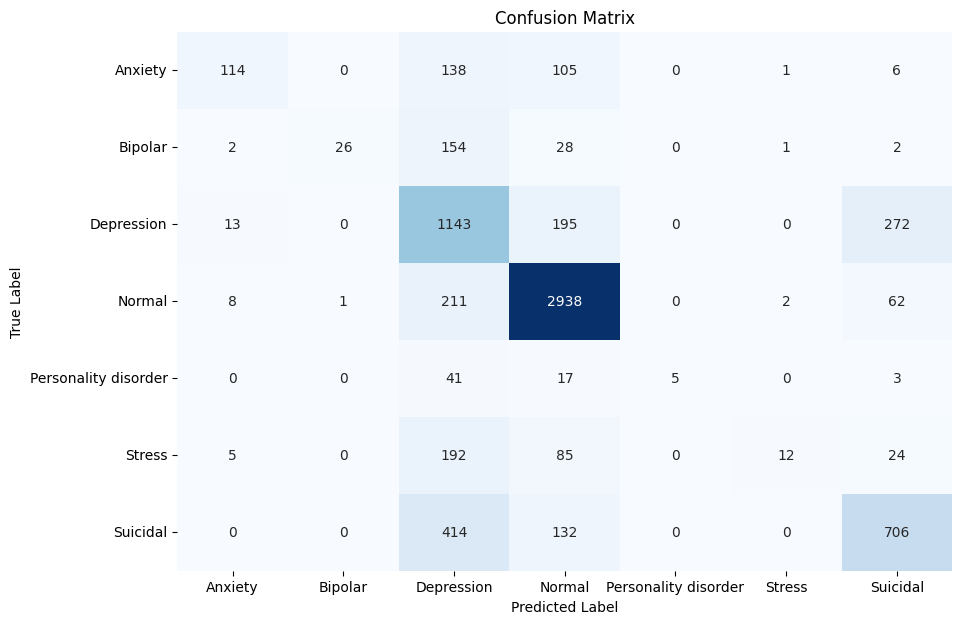

In [13]:
encoder = LabelEncoder()
encoder.fit(y_train)

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

### Visualisasi Distribusi Probabilitas

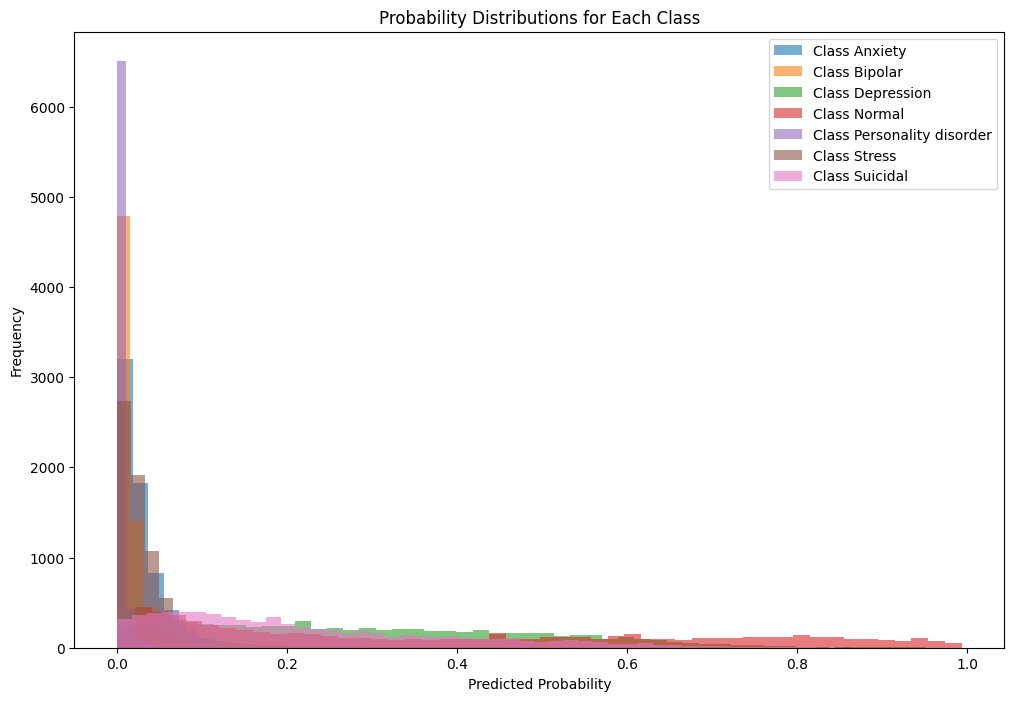

In [14]:
y_pred_prob = model.predict_proba(X_test)

plt.figure(figsize=(12, 8))
for i in range(y_pred_prob.shape[1]):
    plt.hist(y_pred_prob[:, i], bins=50, alpha=0.6, label=f'Class {np.unique(y_test)[i]}')

plt.title('Probability Distributions for Each Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

### Visualisasi ROC Curve

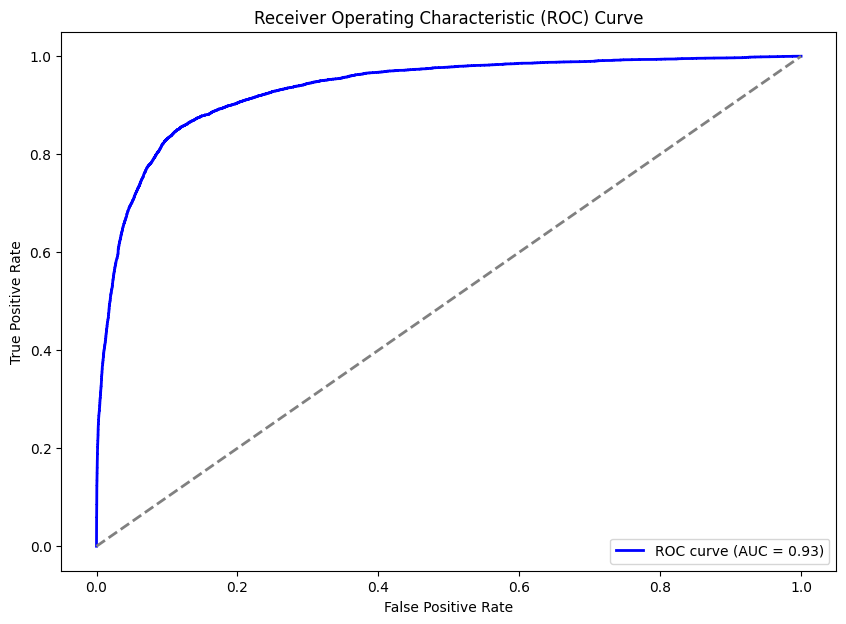

In [15]:
# Binarisasi label
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarisasi label
y_pred_prob = model.predict_proba(X_test)  # Probabilitas prediksi

# Hitung ROC untuk setiap kelas
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [17]:
print("Classification Report for Naive Bayes Model:")
print(classification_report(y_test, y_test_pred))


Classification Report for Naive Bayes Model:
                      precision    recall  f1-score   support

             Anxiety       0.80      0.31      0.45       364
             Bipolar       0.96      0.12      0.22       213
          Depression       0.50      0.70      0.58      1623
              Normal       0.84      0.91      0.87      3222
Personality disorder       1.00      0.08      0.14        66
              Stress       0.75      0.04      0.07       318
            Suicidal       0.66      0.56      0.61      1252

            accuracy                           0.70      7058
           macro avg       0.79      0.39      0.42      7058
        weighted avg       0.73      0.70      0.68      7058

